# Proyecto de Big Data con PySpark
Jorge Martínez López A01704518@tec.mx


**Estructura del proyecto**:https://drive.google.com/drive/folders/1YMsQqe9PjdtNf6RxwLke52sE37Yvimtv?usp=sharing


**Introducción**

Para aprovechar las capacidades de análisis de grandes volúmenes de datos y generación de modelos de aprendizaje automático, se puede realizar una configuración completa del entorno de trabajo en Google Colab para utilizar PySpark, una herramienta esencial para procesamiento y análisis en Big Data. La configuración en Colab permite preparar el ambiente necesario para trabajar de manera óptima con datos masivos y beneficiarse de las funcionalidades de Spark.

Una vez configurado el entorno, se seleccionará una base de datos que cuente con un gran volumen de información. Esta base de datos será la fuente principal para aplicar técnicas de aprendizaje automático utilizando MLlib de PySpark. En función de los objetivos específicos del análisis, se generará un modelo inteligente, que puede ser de clasificación, regresión o agrupamiento, empleando los algoritmos avanzados que ofrece MLlib para cada tarea.

## Dataset

Utilizaremos un dataset de Kaggle que incluye 30,000 imágenes en formato JPG, cada una representando distintas especies de plantas. El tamaño total del dataset es de 1.6 GB, se podria considerar Big Data por los siguientes puntos:

1. El **volumen** de este dataset tiene un tamaño de 1.6GB, lo cual es considerable para imágenes.Sin embargo, al tratarse de 30,000 imágenes, podría considerarse como un volumen grande para aplicaciones específicas de visión por computadora.

2. El dataset muestra **variedad**, ya que tenemos imágenes de diversas plantas en un formato jpg.

3. Este dataset tiene **valor** en diferentes contextos de reconocimiento de plantas, investigación botánica y la clasificación de especies, una área de la ciencia que lleva siglo estudiandoce, no obstante, modelo de este tipo podria ayudar a entender mejor los patrones únicos de años de evolución de las plantas.


### **Estructura Dataset**
1. train con 21,000 img
2. test con 6,000 img
3. val con 3,000 img

Kaggle dataset: https://www.kaggle.com/datasets/marquis03/plants-classification?select=test

Dada dataset cuenta con 30 labels:
1. 'banana'
2. 'aloevera'
3. 'cassava'
4. 'coconut'
5. 'curcuma'
6. 'bilimbi'
7. 'eggplant'
8. 'cucumber'
9. 'cantaloupe'
10. 'corn'
11. 'melon'
12. 'paddy'
13. 'longbeans'
14. 'orange'
15. 'ginger'
16. 'galangal'
17. 'mango'
18. 'guava'
19. 'papaya'
20. 'kale'
21. 'waterapple'
22. 'pineapple'
23. 'spinach'
24. 'tobacco'
25. 'sweetpotatoes'
26. 'watermelon'
27. 'soybeans'
28. 'peperchili'
29. 'shallot'
30. 'pomelo'

##Configuración del entorno de PySpark en Colab

Creamos nuestro espacio de trabajo para usar PySpark y hacer procesamiento de Big Data

In [2]:
#Bibliotecas para poder trabajar con Spark
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.5.3//spark-3.5.3-bin-hadoop3.tgz
!tar xf spark-3.5.3-bin-hadoop3.tgz
#Configuración de Spark con Python
!pip install -q findspark
!pip install pyspark

#Estableciendo variable de entorno
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.3-bin-hadoop3"

#Buscando e inicializando la instalación de Spark
import findspark
findspark.init()
findspark.find()

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,502 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,223 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2

'/content/spark-3.5.3-bin-hadoop3'

## Conexión con Google Drive


Ocupamos conectarnos con google drive para hacer uso del dataset



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Crear la sesión de trabajo de Spark

 Para comenzar a trabajar con PySpark, debemos iniciar la sesión de Spark. Para esto realizaremos lo siguiente:
1.   Importar SparkSession
2.   Crear la sesión



In [4]:
#Verificar la funcionalidad de Pyspark
from pyspark.sql import SparkSession

# Initialize Spark session
spark_session = SparkSession.builder.appName("PySpark_prueba1").getOrCreate()


## Cargar los datos para manipularlos dentro de Spark
1. Dataset train con 20,999 img
2. Dataset test con 6,000 img
3. Datset val con 3,000 img

In [5]:
train_dir = os.path.join('/content/drive/MyDrive/INDIVIDUALES/ISMA/KOKAS/FRUTAS/train')
test_dir = os.path.join('/content/drive/MyDrive/INDIVIDUALES/ISMA/KOKAS/FRUTAS/test')
val_dir = os.path.join('/content/drive/MyDrive/INDIVIDUALES/ISMA/KOKAS/FRUTAS/val')

Obtenemos los labels, que representa cada carpeta dentro de cada folder

In [6]:
labels=os.listdir(train_dir)

print(labels,len(labels))

['banana', 'aloevera', 'cassava', 'coconut', 'curcuma', 'bilimbi', 'eggplant', 'cucumber', 'cantaloupe', 'corn', 'melon', 'paddy', 'longbeans', 'orange', 'ginger', 'galangal', 'mango', 'guava', 'papaya', 'kale', 'waterapple', 'pineapple', 'spinach', 'tobacco', 'sweetpotatoes', 'watermelon', 'soybeans', 'peperchili', 'shallot', 'pomelo'] 30



## Análisis del dataset
Usamos Tableu para hacer un análisis de nuestra dataset de train, val y test
Tableu análisis de metadatos: https://public.tableau.com/app/profile/jorge.martinez1731/viz/Proyecto_17302577108220/Dashboard1?publish=yes

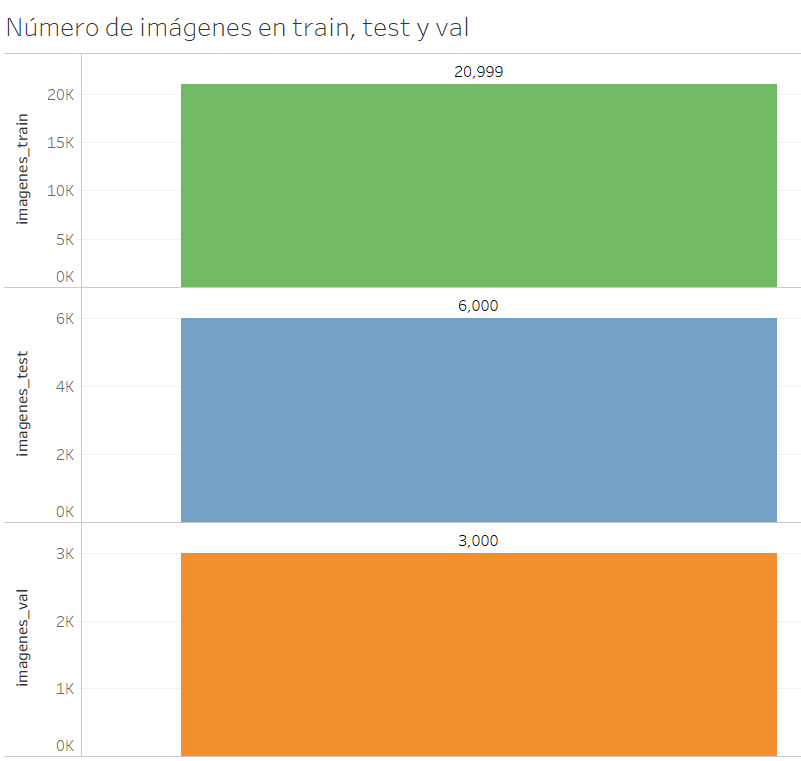

Con el gráfico anterior buscamos visualizar la distribución de las imágenes por folder, con el fin de saber si obtuvimos las 30,000 imágenes descargadas del dataset.
* Dataset train 20,999 imágenes
* Dataset test 6,000 imágenes
* Dataset val 3,000 imágenes

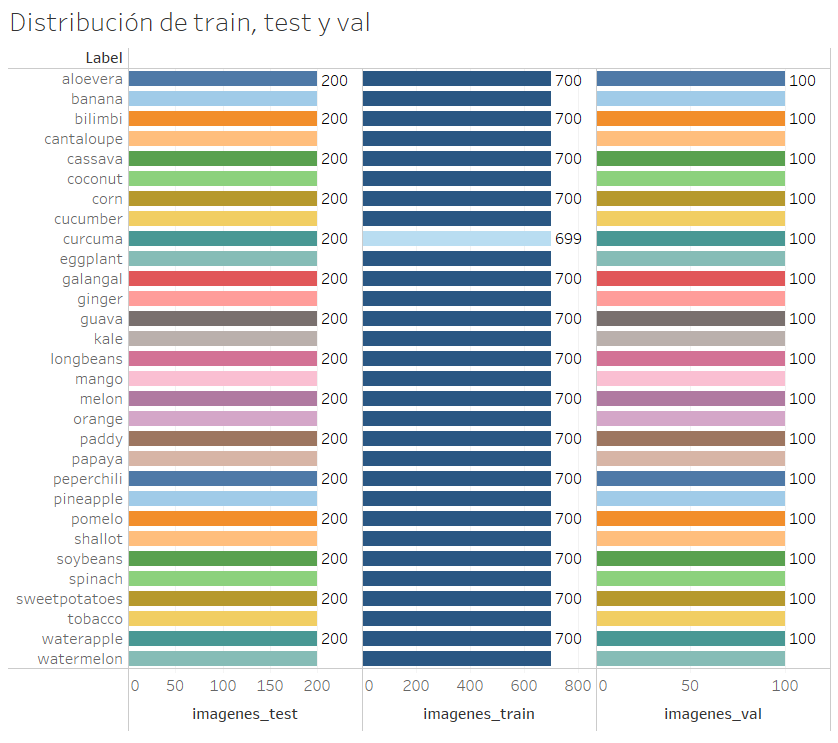



Una vez de saber la distribución total, vamos a rastrear la foto faltante, ya que nuestra dataset tiene una distribución por label homogenea, por lo que será fácil saber cual es la clase a la que le falta una foto.

* Dataset Train 29 labels son 700 img y 1 label de 699 img
* Dataset Test 30 labels de 200 img
* Datasert Val 30 labels de 100 img

No obtante, la imagen faltante no afecta al entrenamiento de nuestro modelo, ya que representa el 0.0033% de la dataset, de otra maenra, podemos entrenar nuestro modelo sin ningún problema.

## Recolección de las imágenes por label de Test, Val y Train

Cargamos las imágenes por folder y va cargando por label.
* Procesar grandes volúmenes de imágenes almacenadas en directorios.
* Preparar datos para modelos de aprendizaje automático, especialmente en tareas de clasificación de imágenes.
* Asegurar que las imágenes están organizadas adecuadamente en conjuntos de entrenamiento, validación y prueba.

In [7]:
from pyspark.sql.functions import input_file_name
import os
from pyspark.ml.image import ImageSchema

# Carga de imágenes de manera recursiva desde subdirectorios (NORMAL, PNEUMONIA)

train_df = []  # Lista para almacenar los DataFrames de entrenamiento
test_df = []   # Lista para almacenar los DataFrames de prueba
val_df = []    # Lista para almacenar los DataFrames de validación
cont = 0       # Contador para seguimiento opcional

# Recorre cada etiqueta en labels
for i in labels:
    # Carga las imágenes del directorio de entrenamiento correspondiente a la etiqueta
    train_df_ = spark_session.read.format("binaryFile") \
        .option("recursiveFileLookup", "true") \
        .option("pathGlobFilter", "*.jpg") \
        .load((train_dir + '/' + i))  # Ruta completa del directorio

    # Carga las imágenes del directorio de prueba correspondiente a la etiqueta
    test_df_ = spark_session.read.format("binaryFile") \
        .option("recursiveFileLookup", "true") \
        .option("pathGlobFilter", "*.jpg") \
        .load(test_dir + '/' + i)  # Ruta completa del directorio

    # Carga las imágenes del directorio de validación correspondiente a la etiqueta
    val_df_ = spark_session.read.format("binaryFile") \
        .option("recursiveFileLookup", "true") \
        .option("pathGlobFilter", "*.jpg") \
        .load(val_dir + '/' + i)  # Ruta completa del directorio

    # Agrega cada DataFrame cargado a la lista correspondiente
    train_df.append(train_df_)
    test_df.append(test_df_)
    val_df.append(val_df_)

# Imprime la cantidad de DataFrames cargados en cada lista
print(len(train_df), len(test_df), len(val_df))


30 30 30


Análizamos el tamaño de lasi mágenes para hacerles las transformaciones pertinentes para reducir su tamaño, con el objetivo de entrenamar más rápido el modelo.

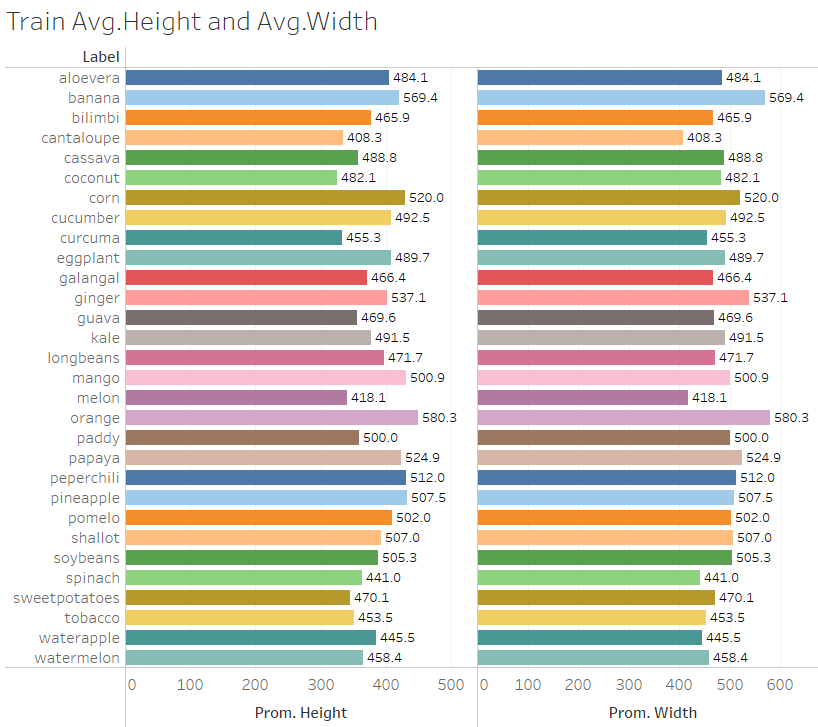

Observamos que en promedio las imagenes por label tienen un tamaño de 400px a 500px de alto por 400px a 500px de ancho, por ende, una imagen mínimo  representaria un tamaño de vector de 400px*400px*3(RGB)=480,000 size.


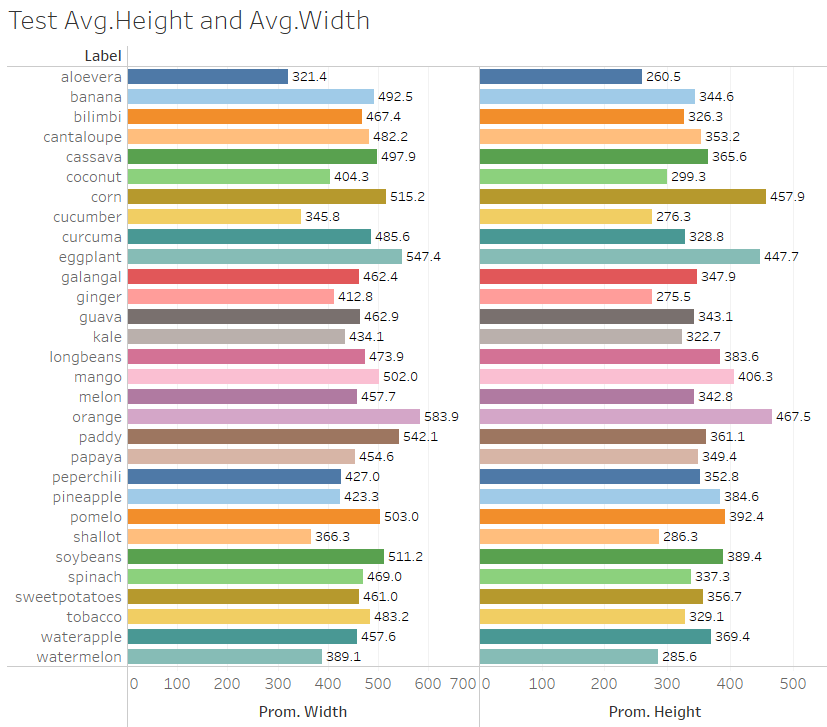

Observamos que en promedio las imagenes por label tienen un tamaño de 200px a 400px de alto por 300px a 400px de ancho, por ende, una imagen mínimo  representaria un tamaño de vector de 200px*300px*3(RGB)=180,000 size, esto quiere decir que tenemos mucha variedad, que dificulta el procesamiento y la velocidad del entrenamiento.



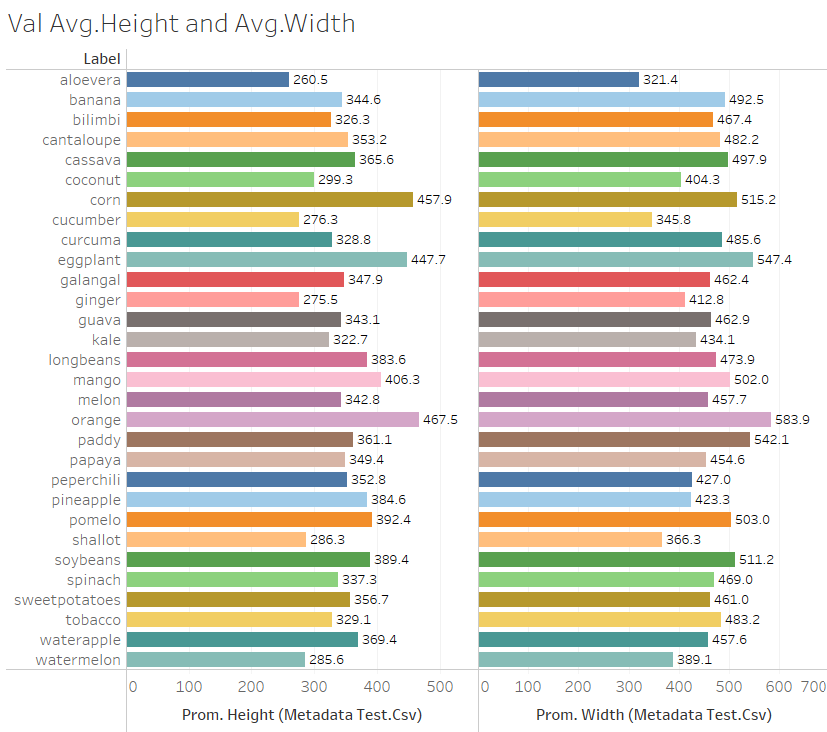

Por último, el tamaño de las imágenes del dataset de validación cuenta una mayor variedad, la cual ocuparemos para validar nuestro modelo.

<hr>

## Decodificación de las imágenes y creación de los features y labels

Transformamos las imágenes redimensionándolas a un tamaño uniforme de 50x50 píxeles para facilitar su procesamiento. Posteriormente, normalizamos los valores de los píxeles para que estén en un rango entre 0 y 1, lo que ayuda a mejorar el rendimiento y estabilidad de los modelos de aprendizaje automático. También decodificamos las imágenes (de formato binario o hexadecimal a valores decimales procesables).

A cada imagen se le asigna su etiqueta correspondiente (label) basada en la carpeta de origen, lo que nos permite identificar la categoría a la que pertenece. Luego, creamos un DataFrame por cada carpeta (entrenamiento, validación y prueba). En cada DataFrame, agregamos una columna que contiene el vector unidimensional resultante de aplanar la imagen redimensionada, que representará las características (features) que utilizará nuestro modelo para entrenarse.




In [8]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType, ArrayType, FloatType
from PIL import Image
import io
import numpy as np

# Función para decodificar la imagen y convertirla en un vector de características
def decode_image(content):
    img = Image.open(io.BytesIO(content))  # Abre la imagen a partir del contenido binario
    img = img.resize((50, 50))  # Redimensiona la imagen a (80, 80)
    img_array = np.array(img).astype(np.float32).flatten() / 255.0  # Normaliza y aplana los valores de píxeles
    return img_array.tolist()  # Retorna la lista para compatibilidad con Spark

# Función para extraer la etiqueta en función de la ruta del archivo
def get_label(path):
    for i in labels:
        if i in path:
            return labels.index(i) + 1  # Retorna el índice de la etiqueta
    return -1  # Si no encuentra coincidencias, retorna -1

# Registra la UDF para decodificar imágenes
decode_image_udf = udf(decode_image, ArrayType(FloatType()))
# Registra la UDF para obtener las etiquetas
label_udf = udf(get_label, IntegerType())

# Listas para almacenar DataFrames procesados para test, validación y entrenamiento
processed_dfs_test = []
processed_dfs_val = []
processed_dfs_train = []

# Procesa cada DataFrame en las listas de test, val y train
for i in range(len(test_df)):
    # Agrega columna de características a test
    df1 = test_df[i].withColumn("features", decode_image_udf(test_df[i]["content"]))
    df1 = df1.withColumn("label", label_udf(df1["path"]))  # Agrega la columna de etiquetas
    processed_dfs_test.append(df1)  # Agrega DataFrame procesado a la lista de test

    # Agrega columna de características a val
    df2 = val_df[i].withColumn("features", decode_image_udf(val_df[i]["content"]))
    df2 = df2.withColumn("label", label_udf(df2["path"]))  # Agrega la columna de etiquetas
    processed_dfs_val.append(df2)  # Agrega DataFrame procesado a la lista de val

    # Agrega columna de características a train
    df3 = train_df[i].withColumn("features", decode_image_udf(train_df[i]["content"]))
    df3 = df3.withColumn("label", label_udf(df3["path"]))  # Agrega la columna de etiquetas
    processed_dfs_train.append(df3)  # Agrega DataFrame procesado a la lista de train

# Concatena todos los DataFrames en test, val y train
test_df_test = processed_dfs_test[0]
for df in processed_dfs_test[1:]:
    test_df_test = test_df_test.unionByName(df)

val_df_val = processed_dfs_val[0]
for df in processed_dfs_val[1:]:
    val_df_val = val_df_val.unionByName(df)

train_df_train = processed_dfs_train[0]
for df in processed_dfs_train[1:]:
    train_df_train = train_df_train.unionByName(df)

# Muestra el resultado para verificar la concatenación
row_count1 = test_df_test.select("path", "label", "features").count()  # Cuenta filas en test
row_count2 = val_df_val.select("path", "label", "features").count()  # Cuenta filas en val
row_count3 = train_df_train.select("path", "label", "features").count()  # Cuenta filas en train

# Muestra el resultado de los conteos
print(f"El DataFrame de test tiene {row_count1} filas.")
print(f"El DataFrame de val tiene {row_count2} filas.")
print(f"El DataFrame de train tiene {row_count3} filas.")

El DataFrame de test tiene 6000 filas.
El DataFrame de val tiene 3000 filas.
El DataFrame de train tiene 20999 filas.


### Validación y limpieza de datos 

Estandarizar las características en vectores de longitud consistente y formato adecuado (DenseVector) para su uso en modelos de Spark ML.
Filtrar imágenes con tamaños inesperados garantiza que los datos de entrada sean consistentes y adecuados para el modelo.

El código convierte las características de las imágenes (arrays de píxeles) en vectores densos (DenseVector), un formato necesario para los modelos de Spark ML. Luego, verifica que todos los vectores tengan un tamaño consistente (por ejemplo, 7500 elementos para imágenes RGB de 50×50×3) y filtra los datos para eliminar imágenes con dimensiones inesperadas. Esto asegura que el conjunto de datos esté limpio, estandarizado y listo para el entrenamiento del modelo

In [9]:
from pyspark.sql.functions import udf
from pyspark.ml.linalg import Vectors, VectorUDT
from pyspark.ml.feature import StandardScaler
from pyspark.sql.types import IntegerType

# UDF para convertir un array de floats en un DenseVector
def array_to_vector(arr):
    return Vectors.dense(arr)

# Registra la UDF con el tipo de retorno correcto
array_to_vector_udf = udf(array_to_vector, VectorUDT())

# Convierte la columna de características en DenseVector
train_df_train_2 = train_df_train.withColumn("features_vector", array_to_vector_udf(train_df_train["features"]))

# Verifica la consistencia de las dimensiones de las características para los DataFrames de entrenamiento y prueba
train_df_train_2 = train_df_train_2.withColumn("vector_size", udf(lambda x: len(x), IntegerType())(train_df_train_2["features"]))

# Verifica los tamaños únicos de los vectores en los datos de entrenamiento
vector_sizes = train_df_train_2.select("vector_size").distinct().collect()
print("Tamaños únicos de vectores en los datos de entrenamiento:", [row['vector_size'] for row in vector_sizes])

# Filtra para asegurar una longitud consistente de los vectores de características, asumiendo 50*50=2500 para imágenes en escala de grises o 50*50*3=7500 para RGB
expected_size =7500 # Ajustar a 7500 si las imágenes son RGB

# Filtra el DataFrame para que solo incluya vectores de características de tamaño esperado
train_df_3 = train_df_train_2.filter(train_df_train_2["vector_size"] == expected_size)

train_df_3.show(10)

Tamaños únicos de vectores en los datos de entrenamiento: [7500]
+--------------------+-------------------+------+--------------------+--------------------+-----+--------------------+-----------+
|                path|   modificationTime|length|             content|            features|label|     features_vector|vector_size|
+--------------------+-------------------+------+--------------------+--------------------+-----+--------------------+-----------+
|file:/content/dri...|2024-10-28 16:52:08|791130|[FF D8 FF E0 00 1...|[0.40784314, 0.4,...|    1|[0.40784314274787...|       7500|
|file:/content/dri...|2024-10-28 16:52:40|743837|[FF D8 FF E0 00 1...|[0.80784315, 0.76...|    1|[0.80784314870834...|       7500|
|file:/content/dri...|2024-10-28 16:52:25|574106|[FF D8 FF E0 00 1...|[0.654902, 0.3764...|    1|[0.65490198135375...|       7500|
|file:/content/dri...|2024-10-28 16:52:35|534694|[FF D8 FF E0 00 1...|[0.9098039, 0.854...|    1|[0.90980392694473...|       7500|
|file:/content/dri

### Reducción de samples para entrenamiento
Reducimos la cantidad de muestras en el DataFrame debido a las limitaciones de recursos del servidor en PySpark cuando se utiliza en Colab. El entrenamiento de modelos de este tipo requiere una gran cantidad de recursos, y para evitar el consumo excesivo de memoria y procesamiento, es necesario ajustar el tamaño del conjunto de datos.

In [10]:
fraction = 10000 / train_df_3.count()  # Calculate the fraction for the desired sample size
train_df_sampled = train_df_3.sample(withReplacement=False, fraction=fraction, seed=42)
print('Dataset',train_df_sampled.count())

Dataset 9999


Entrenamos el modelo y mostramos resultados


Utilizamos 10,000 datos de 20,999, en colab no se puede procesar grandes cantidades de datos, ya que los servidores no soporta el flujo continuo de datos para el ajuste de los pesos del modelo.

## Random Forest Classifier Train


Convertimos los datos de entrada (imágenes) en vectores de características numéricas que pueden ser interpretados por el modelo, permitiendo que el clasificador capture patrones en los datos.


Elegimos un conjunto específico de características con un tamaño de 7,500 para entrenar el modelo, que representa el 50* 50* 3=7,500 para RGB. Esto asegura que el modelo trabaje con una representación consistente y suficiente de los datos, manteniendo la dimensionalidad requerida para capturar patrones significativos.


* Variable dependiente (y): Es el label o etiqueta de clase que queremos predecir.

* Variable independiente (X): Es el vector de características (features_vector).

**Modelo:**

Utilizamos un Random Forest Classifier, que es un modelo de clasificación basado en un conjunto de árboles de decisión.


Este clasificador es robusto frente al sobreajuste y ofrece una buena precisión en problemas complejos, especialmente cuando se dispone de una gran cantidad de características.

In [13]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Crear el modelo de Random Forest
rf = RandomForestClassifier(featuresCol='features_vector', labelCol='label', numTrees=30, maxDepth=2)

# Entrenar el modelo con el conjunto de datos de entrenamiento
print("Entrenando el modelo Random Forest...")
lrModel = rf.fit(train_df_sampled)
print("Modelo Random Forest entrenado.")

# Print the number of trees in the model
print(f"Number of Trees: {lrModel.getNumTrees}")

# Feature importances
print("Feature Importances:")
print(lrModel.featureImportances)

# Display model parameters
print("Model Parameters:")
print(lrModel.explainParams())


Entrenando el modelo Random Forest...
Modelo Random Forest entrenado.
Number of Trees: 30
Feature Importances:
(7500,[2191,2761,2902,2911,2943,2949,3070,3088,3094,3096,3229,3360,3367,3372,3387,3391,3393,3529,3537,3540,3660,3662,3663,3699,3807,3813,3825,3831,3834,3845,3849,3981,3983,3984,3988,3999,4113,4114,4127,4131,4134,4150,4172,4259,4284,4288,4399,4416,4423,4443,4560,4562,4570,4575,4581,4584,4587,4702,4707,4710,4722,4743,4745,4746,4848,4881,4890,4938,5002,5007,5030,5039,5043,5151,5175,5197,6446,6741],[0.006324937035522019,0.00730217237652356,0.007813119599355052,0.00766558405897232,0.011027825034226231,0.008526400010423736,0.009485796125576254,0.017768773309152927,0.009916588301453888,0.016379210784383775,0.007623202993926419,0.007764638534937707,0.0066917568765713685,0.0074001901702459415,0.01611194483369011,0.0140670954913258,0.007670999464632999,0.008551021141358747,0.04116551474457217,0.017390950221361844,0.007419850139117123,0.00999371525735099,0.01723228969390246,0.01678162849

<hr>

## Evaluación del modelo con dataset Test
Evaluamos nuestro modelo con el set de prueba, no obstnate, primeramente vectorizamos nuestras imágenes dentro del dataset test y aplicamos las transformaciones para poder hacer predicciones, como lo hicimos anteriormente. 


In [15]:
# Convierte la columna de características en DenseVector
test_df_test_2 = test_df_test.withColumn("features_vector", array_to_vector_udf( test_df_test["features"]))

# Verifica la consistencia de las dimensiones de las características para los DataFrames de entrenamiento y prueba
test_df_test_2 =  test_df_test_2.withColumn("vector_size", udf(lambda x: len(x), IntegerType())( test_df_test_2["features"]))

# Verifica los tamaños únicos de los vectores en los datos de entrenamiento
vector_sizes2 =  test_df_test_2.select("vector_size").distinct().collect()
print("Tamaños únicos de vectores en los datos de entrenamiento:", [row['vector_size'] for row in vector_sizes2])

expected_size =7500

# Filtra el DataFrame para que solo incluya vectores de características de tamaño esperado
test_df_3 =  test_df_test_2.filter( test_df_test_2["vector_size"] == expected_size)

test_df_3.show(5)

Tamaños únicos de vectores en los datos de entrenamiento: [7500, 2500]
+--------------------+-------------------+------+--------------------+--------------------+-----+--------------------+-----------+
|                path|   modificationTime|length|             content|            features|label|     features_vector|vector_size|
+--------------------+-------------------+------+--------------------+--------------------+-----+--------------------+-----------+
|file:/content/dri...|2024-10-28 16:46:13|672405|[FF D8 FF E0 00 1...|[0.22745098, 0.56...|    1|[0.22745098173618...|       7500|
|file:/content/dri...|2024-10-28 16:46:12|406274|[FF D8 FF E0 00 1...|[0.3764706, 0.403...|    1|[0.37647059559822...|       7500|
|file:/content/dri...|2024-10-28 16:46:13|396911|[FF D8 FF E0 00 1...|[0.011764706, 0.0...|    1|[0.01176470611244...|       7500|
|file:/content/dri...|2024-10-28 16:46:11|289594|[FF D8 FF E0 00 1...|[0.52156866, 0.53...|    1|[0.52156865596771...|       7500|
|file:/conte

Evaluamos el modelo y mostramos su Accuracy del set de prueba

In [16]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Make predictions on the validation data
predictions = lrModel.transform(test_df_3 )

# Evaluate with accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Test Accuracy: {accuracy}")

# Evaluate with F1 score
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1_score = evaluator.evaluate(predictions)
print(f"Test F1 Score: {f1_score}")

Test Accuracy: 0.08868144690781797
Test F1 Score: 0.03099251462198977


La precisión del modelo con el set de prueba es del 8.8% con un F1 del 3%

<hr>

## Evaluación del modelo con dataset val

Evaluamos nuestro modelo con el set de validación, no obstnate, primeramente vectorizamos nuestras imágenes dentro del dataset validación y aplicamos las transformaciones pertinentes para poder hacer predicciones, y validar si nuestro modelo aprendió de manera eficiente. 


In [17]:
# Convert features column to DenseVector

val_df_val_2 = val_df_val.withColumn("features_vector", array_to_vector_udf(val_df_val["features"]))

# Verify consistency of feature dimensions for both train and test dataframes
val_df_val_2 = val_df_val_2.withColumn("vector_size", udf(lambda x: len(x), IntegerType())(val_df_val_2["features"]))

# Check unique vector sizes in training data
vector_sizes = val_df_val_2.select("vector_size").distinct().collect()
print("Unique vector sizes in training data:", [row['vector_size'] for row in vector_sizes])


val_df_3 = val_df_val_2.filter(val_df_val_2["vector_size"] == expected_size)
print('right',val_df_3.count())

Unique vector sizes in training data: [7500]
right 3000


Evaluamos el modelo y mostramos su Accuracy del set de validación

In [18]:
# Evaluate the model (note: LinearRegression is typically evaluated with RegressionEvaluator, not BinaryClassificationEvaluator)

from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Make predictions on the validation data
predictions = lrModel.transform(val_df_3 )

# Evaluate with accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Test Accuracy: {accuracy}")

# Evaluate with F1 score
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1_score = evaluator.evaluate(predictions)
print(f"Test F1 Score: {f1_score}")

Test Accuracy: 0.08366666666666667
Test F1 Score: 0.02875874337566324


La precisión del modelo con el set de validadción es del 8.3% con un F1 del 2.8%

<hr>

# Conclusión 

El modelo está experimentando underfitting, lo que indica que no está realizando predicciones precisas y no ha aprendido adecuadamente las características de las imágenes. Esto podría deberse a varios factores: en primer lugar, redimensionamos las imágenes a 50x50 píxeles, lo que redujo considerablemente la información disponible para el modelo. Además, utilizamos solo la mitad del conjunto de datos disponible, con 9999 de 20999 muestras, lo que limita aún más la cantidad de información para entrenar el modelo, especialmente considerando que debe predecir 30 etiquetas. Por otro lado, se implementaron restricciones en la arquitectura del modelo, limitando el número de raíces a 30 y la profundidad a dos niveles, ya que añadir más complejidad (más ramas y profundidad) resultaría en un aumento exponencial en la cantidad de iteraciones requeridas. Estas limitaciones fueron necesarias debido a las restricciones de recursos en los servidores de PySpark. En conjunto, estos factores contribuyen al rendimiento subóptimo del modelo. 

## Mejoras 

Entrenar el modelo con PySpark de forma local para dedicar una CPU única y evitar limitaciones, y contra tiempos. 

